# Bank Marketing Classification

In this part of the assignment we want to do a classification task using PyTorch on bank marketing dataset.

# Import Library

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import tqdm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from torch.utils.data import DataLoader, TensorDataset
import csv

# Load Dataset
Here, you should download and load the dataset. After that, you should split train dataset to train and validation sets. Finally, define the dataloaders for `train`, `validation` and `test`

In [2]:
with open("bank-full.csv") as file:
    reader = csv.reader(file)
    split_data = [row[0].split(';') for row in reader]
    df = pd.DataFrame(split_data[1:], columns=split_data[0])

df.columns = [col.strip().replace('\"', '') for col in df.columns]

y = df['y']
y = y.apply(lambda x: 1 if x.strip() == '\"yes\"' else 0)

X = df.drop(columns='y')

le = LabelEncoder()
for col in X.columns:
    X[col] = le.fit_transform(X[col]) if X[col].dtype == 'object' else X[col]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,"""management""","""married""","""tertiary""","""no""",2143,"""yes""","""no""","""unknown""",5,"""may""",261,1,-1,0,"""unknown""","""no"""
1,44,"""technician""","""single""","""secondary""","""no""",29,"""yes""","""no""","""unknown""",5,"""may""",151,1,-1,0,"""unknown""","""no"""
2,33,"""entrepreneur""","""married""","""secondary""","""no""",2,"""yes""","""yes""","""unknown""",5,"""may""",76,1,-1,0,"""unknown""","""no"""
3,47,"""blue-collar""","""married""","""unknown""","""no""",1506,"""yes""","""no""","""unknown""",5,"""may""",92,1,-1,0,"""unknown""","""no"""
4,33,"""unknown""","""single""","""unknown""","""no""",1,"""no""","""no""","""unknown""",5,"""may""",198,1,-1,0,"""unknown""","""no"""


# Normalize data
normalize numerical data.

In [3]:
num_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_val[num_cols] = scaler.transform(X_val[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# Create Data Loader
create data loader for pytorch

In [7]:
train_tensor = TensorDataset(torch.tensor(X_train.values, dtype=torch.float32), torch.tensor(y_train.values, dtype=torch.float32))
val_tensor = TensorDataset(torch.tensor(X_val.values, dtype=torch.float32), torch.tensor(y_val.values, dtype=torch.float32))
test_tensor = TensorDataset(torch.tensor(X_test.values, dtype=torch.float32), torch.tensor(y_test.values, dtype=torch.float32))
train_loader = DataLoader(train_tensor, batch_size=32, shuffle=True)
val_loader = DataLoader(val_tensor, batch_size=32, shuffle=False)
test_loader = DataLoader(test_tensor, batch_size=32, shuffle=False)

-----------
[tensor([[ 1.3251,  4.0000,  1.0000,  1.0000,  0.0000,  1.0618,  1.0000,  0.0000,
          0.0000, -0.8384,  0.0000, -1.7946, -0.9110, -0.3684, -0.3391,  3.0000],
        [-0.7469,  9.0000,  1.0000,  2.0000,  0.0000, -0.2047,  1.0000,  0.0000,
          2.0000, -0.4991,  6.0000, -0.8059, -0.1307, -0.3684, -0.3391,  3.0000],
        [-0.1818,  2.0000,  1.0000,  2.0000,  0.0000, -0.6366,  0.0000,  0.0000,
          0.0000, -0.8384,  9.0000,  0.2890, -0.9110, -0.3684, -0.3391,  3.0000],
        [-1.4062,  6.0000,  2.0000,  2.0000,  0.0000, -0.6222,  0.0000,  0.0000,
          0.0000,  0.8579,  0.0000,  0.3459, -0.9110, -0.3684, -0.3391,  3.0000],
        [-0.9353,  4.0000,  0.0000,  2.0000,  0.0000, -1.1893,  1.0000,  0.0000,
          2.0000,  1.4233,  8.0000,  1.9506,  0.6496, -0.3684, -0.3391,  3.0000],
        [-0.8411,  1.0000,  1.0000,  1.0000,  0.0000, -0.9856,  1.0000,  1.0000,
          2.0000,  1.6495,  8.0000, -0.2804,  0.6496, -0.3684, -0.3391,  3.0000],
        [

# Model
define your model in here

In [5]:
class BankMarketingNet(nn.Module):
    def __init__(self):
        super(BankMarketingNet, self).__init__()
        self.fc1 = nn.Linear(16, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 16)
        self.fc4 = nn.Linear(16, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.sigmoid(self.fc4(x))
        return x

# Train your model
Define `criterion` and `optimizer`.
Train your model

Tasks:
- Things that are needed to be printed in each epoch:
  - Number of epoch
  - Train loss
  - Validation loss
- save train/validation loss (of each epoch) in an array for later usage

In [6]:
model = BankMarketingNet()

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_losses = []
val_losses = []

num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for data, target in train_loader:
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output.squeeze(), target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    
    train_loss /= len(train_loader)
    train_losses.append(train_loss)

    model.eval()
    val_loss = 0
    with torch.no_grad():
        for data, target in val_loader:
            output = model(data)
            loss = criterion(output.squeeze(), target)
            val_loss += loss.item()
    
    val_loss /= len(val_loader)
    val_losses.append(val_loss)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}')

print('Train Losses:', train_losses)
print('Validation Losses:', val_losses)

Epoch [1/10], Train Loss: 0.3333, Validation Loss: 0.3186
Epoch [2/10], Train Loss: 0.3131, Validation Loss: 0.3090
Epoch [3/10], Train Loss: 0.3070, Validation Loss: 0.3027
Epoch [4/10], Train Loss: 0.3027, Validation Loss: 0.2971
Epoch [5/10], Train Loss: 0.2982, Validation Loss: 0.2943
Epoch [6/10], Train Loss: 0.2948, Validation Loss: 0.2936
Epoch [7/10], Train Loss: 0.2921, Validation Loss: 0.2919
Epoch [8/10], Train Loss: 0.2909, Validation Loss: 0.2925
Epoch [9/10], Train Loss: 0.2895, Validation Loss: 0.2946
Epoch [10/10], Train Loss: 0.2883, Validation Loss: 0.2911
Train Losses: [0.33328668478049606, 0.3130901228277479, 0.30701095718893723, 0.30270995701655784, 0.2981947225038453, 0.2948408875775801, 0.2921003772095702, 0.2909416798683366, 0.2895248557591628, 0.28826830478156173]
Validation Losses: [0.3185648120624918, 0.3089569750910913, 0.30270263815010096, 0.297114231374482, 0.29431113899803496, 0.2935574754128154, 0.29189560174102513, 0.2924650043354068, 0.2945655856124112

### Visualize Loss plot

Using the arrays that you have (from previous task in the above section), visualize Loss plot (train and validation together)

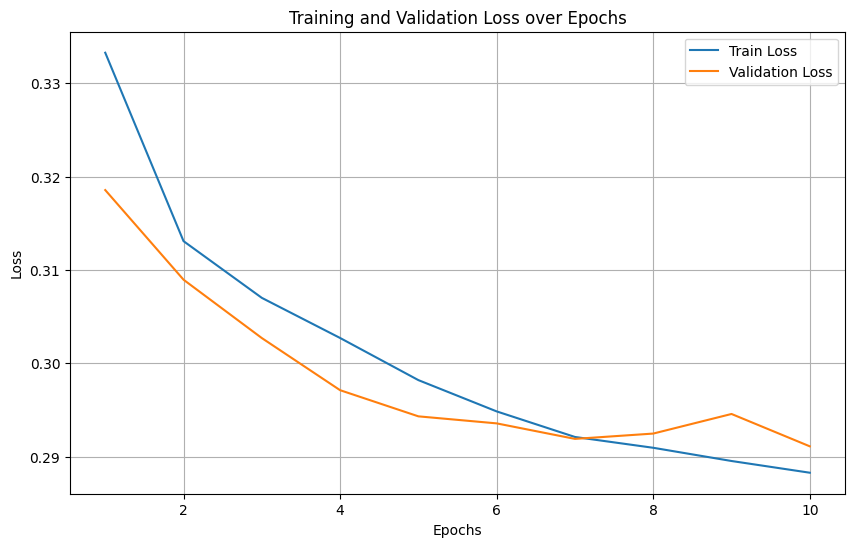

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs+1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.grid(True)
plt.show()

## Evaluation

Test your trained model (using the Test Dataloader that you have).

In [8]:
model.eval()
test_loss = 0
correct = 0
total = 0

with torch.no_grad():
    for data, target in test_loader:
        output = model(data)
        loss = criterion(output.squeeze(), target)
        test_loss += loss.item()
        predicted = (output.squeeze() > 0.5).float()
        total += target.size(0)
        correct += (predicted == target).sum().item()

test_loss /= len(test_loader)
accuracy = correct / total

print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {accuracy:.4f}')

Test Loss: 0.3203, Test Accuracy: 0.8808
